## Personal report for participant07(Dataset)
de shi 

SID:510526247

Data import and Cleaning

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')#located on the google drive file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
P7_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-07.csv", sep=",")#read the data use pandas
P7_data 

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6128,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0
6129,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0
6130,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0
6131,13-Sep-2022 10:00,13-Sep-2022 11:00,328.0


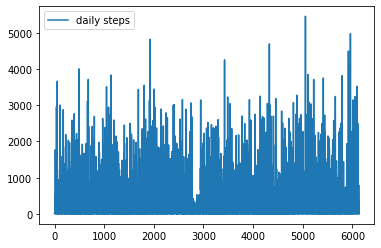

In [4]:
y = P7_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()#draw the plot and brief look at the visualision of data

In [5]:
P7_data['Steps (count)'].fillna(0,inplace = True)
data07 = P7_data.drop(['Start'],axis = 1)#select the column that needed 
data07

,Finish,Steps (count)
0,01-Jan-2022 01:00,32.0
1,01-Jan-2022 02:00,0.0
2,01-Jan-2022 03:00,0.0
3,01-Jan-2022 04:00,0.0
4,01-Jan-2022 05:00,0.0
...,...,...
6128,13-Sep-2022 08:00,798.0
6129,13-Sep-2022 09:00,139.0
6130,13-Sep-2022 10:00,392.0
6131,13-Sep-2022 11:00,328.0


In [6]:
Date = data07['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# choose the column that approate for the goal, here we select the length from 1-11.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
# Date01 = data07['Finish']
# date07 = []
# for i in range(len(Date01)):
#   for line in Date01:
#     if line[3:6] == 'Jan':
#       line[3:6].replace('01')
      
#     elif line[3:6] =='Feb':
#       line[3:6] = '2'
#     else:
#       pass


In [8]:
data07

,Finish,Steps (count)
0,01-Jan-2022,32.0
1,01-Jan-2022,0.0
2,01-Jan-2022,0.0
3,01-Jan-2022,0.0
4,01-Jan-2022,0.0
...,...,...
6128,13-Sep-2022,798.0
6129,13-Sep-2022,139.0
6130,13-Sep-2022,392.0
6131,13-Sep-2022,328.0


In [9]:
data07['Finish'] = data07['Finish'].apply(pd.to_datetime)#transfer the month form letter into numerical.
data07
# print(type(data07['Finish']))

,Finish,Steps (count)
0,2022-01-01,32.0
1,2022-01-01,0.0
2,2022-01-01,0.0
3,2022-01-01,0.0
4,2022-01-01,0.0
...,...,...
6128,2022-09-13,798.0
6129,2022-09-13,139.0
6130,2022-09-13,392.0
6131,2022-09-13,328.0


In [10]:
data07.info()#check the data with basic information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Finish         6133 non-null   datetime64[ns]
 1   Steps (count)  6133 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 96.0 KB


In [11]:
weeksum = pd.DataFrame(data07.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()#seprarte the date into week 
weeksum.head(10)#check the first 10 data for weeksum

,Finish,Steps (count)
0,2022-01-02,14740.0
1,2022-01-09,48061.0
2,2022-01-16,45772.0
3,2022-01-23,64605.0
4,2022-01-30,52111.0
5,2022-02-06,52746.0
6,2022-02-13,57124.0
7,2022-02-20,66694.0
8,2022-02-27,47431.0
9,2022-03-06,51290.0


In [12]:
import plotly.express as px
plot = px.box(weeksum,x ='Steps (count)')
plot.show()#draw the boxplot to see the whole data that distributed.

Here I use plotly.express package to draw the boxplot to see the whole natural of 01dataset with 13084stpes which is minimum and with 3 outliers, the underlimit is 42272steps and Q1(25%) is 49862 steps and the median is 54129.5 steps

In [13]:
fig = px.histogram(weeksum, x="Finish",y ='Steps (count)' ,nbins =len(weeksum),color_discrete_sequence=['indianred'])
fig.show()

In [14]:
W7 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W7.head(10)

,week,Steps (count)
0,1,48061.0
1,2,45772.0
2,3,64605.0
3,4,52111.0
4,5,52746.0
5,6,57124.0
6,7,66694.0
7,8,47431.0
8,9,51290.0
9,10,53692.0


In [15]:
W7.to_csv('/content/drive/MyDrive/Colab Notebooks/Participant07_new.csv',index= False,sep= ',')

In [16]:
fig = px.pie(W7, values='Steps (count)', names='week', title="Weeks of steps")
fig.show()

The pie chart that i use the plotly(.express) package to see how  each week steps seprate by percentage among the whole dataset.
And observsed week37, week52, week17 with the smallest steps with about 1% for overall data.

In [17]:
# plt.pie(W7['Steps (count)'], labels =W7['week'])
# plt.subplots_adjust(0.1,0,2,2)
# plt.legend()
# plt.show() 

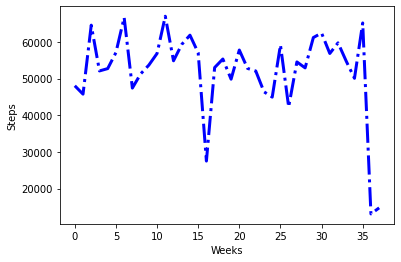

In [18]:
plt.plot(W7['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show()

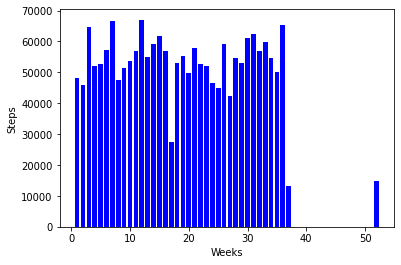

In [19]:
plt.bar(W7['week'],W7['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show() 

The graph above is the barchart of Weeks and step count graph,There are 35weeks data as the data is collected in Step.

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

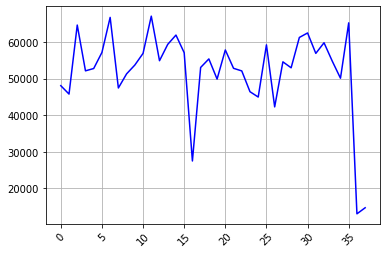

In [20]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(W7.index, W7['Steps (count)'], c='blue')
plt.xticks(rotation=45)

In [21]:
mean = weeksum['Steps (count)'].mean()
mean

52200.045560908264

The graph is the scatterplot for particapant07 dataset and we can see the trend stay is a certain level and the average steps is 52200 per weeks(from the boxplot draw above)

# Sub Question

How does week-to-week steps affect by the rainfall ?

*Below is the graph of Sydney yearly average rainfall*

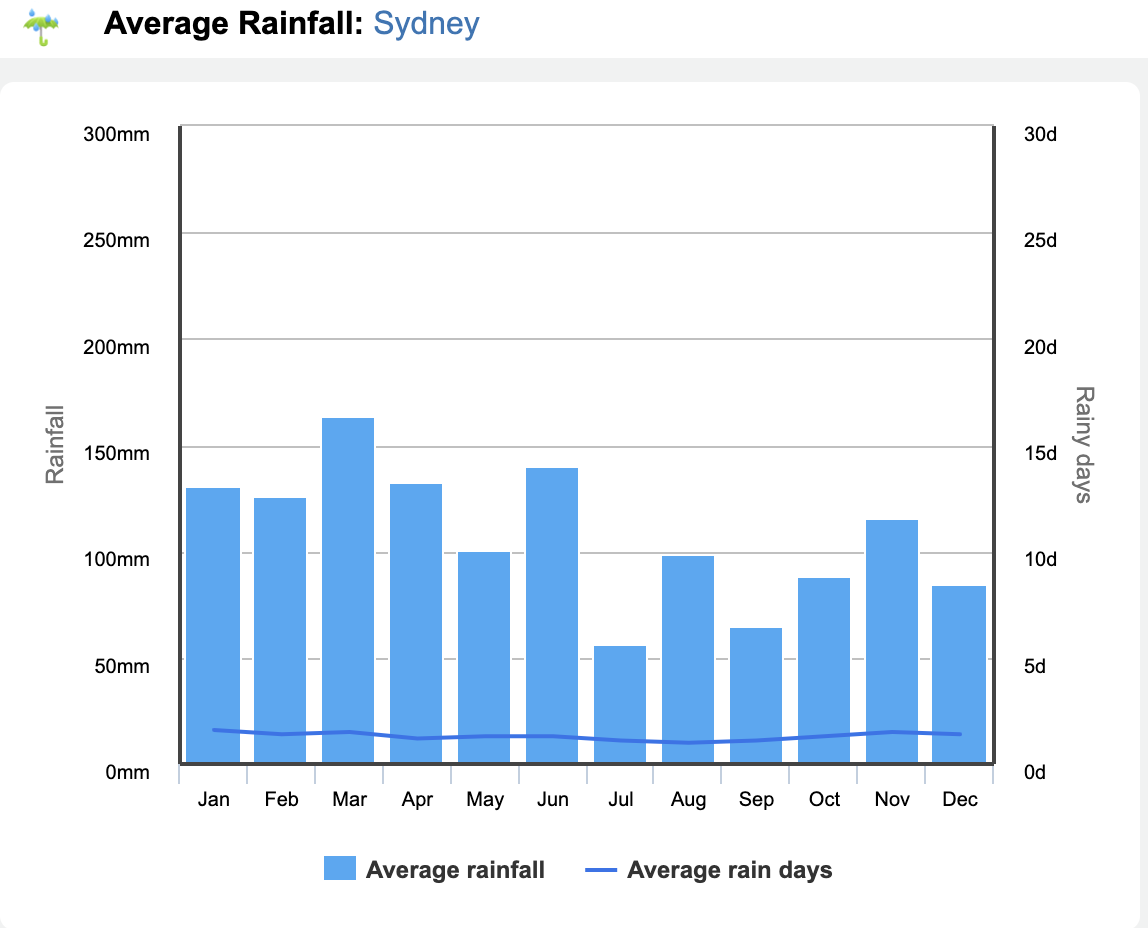

As through the graph of average rainfall,I find that in Mar and jun there are more rainfall and compare with the steps graph from week 9 to week 12, week 24 to week 27 there are slight drap in steps count and in week 16 which have a significant down may caused by the rainfall. At last we can see the rainfall graph have similar pattern with the steps count graph, So we guees there exist a relationship between them.

# Subquestion form Ran sun

Does temperature affect people's willingness to walk?

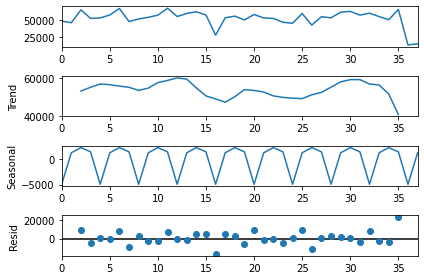

In [22]:
# Basic time series model: step count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t), where t = any day
m7 =W7
m7['week']=m7.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m7.drop(columns=['week']), model = 'additive',period=4)
fig = decomposition.plot()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

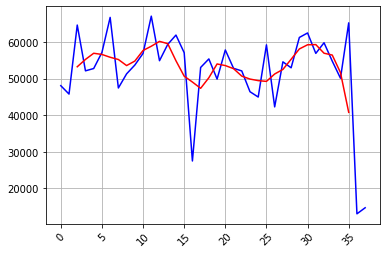

In [23]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m7.index, m7['Steps (count)'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

# Visualization conclusions
**Trends**

From trend graph above, we could see there is an slight decresing  trend from week to week until March and july respectively.

# Overall conclusion 
I get the conclusion different argument with ransun's ,I conclude that the trend of step count will start with an decresing tendency in date with lower temperature. According to the visualization, autumns in Australia which would be a better preference for people to walk. Hence, people would take more step counts in summer like January and less steps in autumn or winter.

# Sub question for Pengyu Liu

Does the steps for each week affect by season?


With data from different months I wanted to explore if the seasons affect the number of steps, so I copied the previous dataset

In [24]:
gb_month = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week, weeksum['Finish'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()
gb_month.head()

,week,month,Steps (count)
0,1,1,48061.0
1,2,1,45772.0
2,3,1,64605.0
3,4,1,52111.0
4,5,2,52746.0


In [25]:
season = gb_month.copy()
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')

Now we have successfully transformed every three months into a seasonal format

Change the schema name

In [26]:
season.rename({"Steps (count)":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)

In [27]:
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks

gb_season.head()

sum of steps
season week              
Fall   9          51290.0
       10         53692.0
       11         56876.0
       12         67035.0
       13         54875.0

In [28]:
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

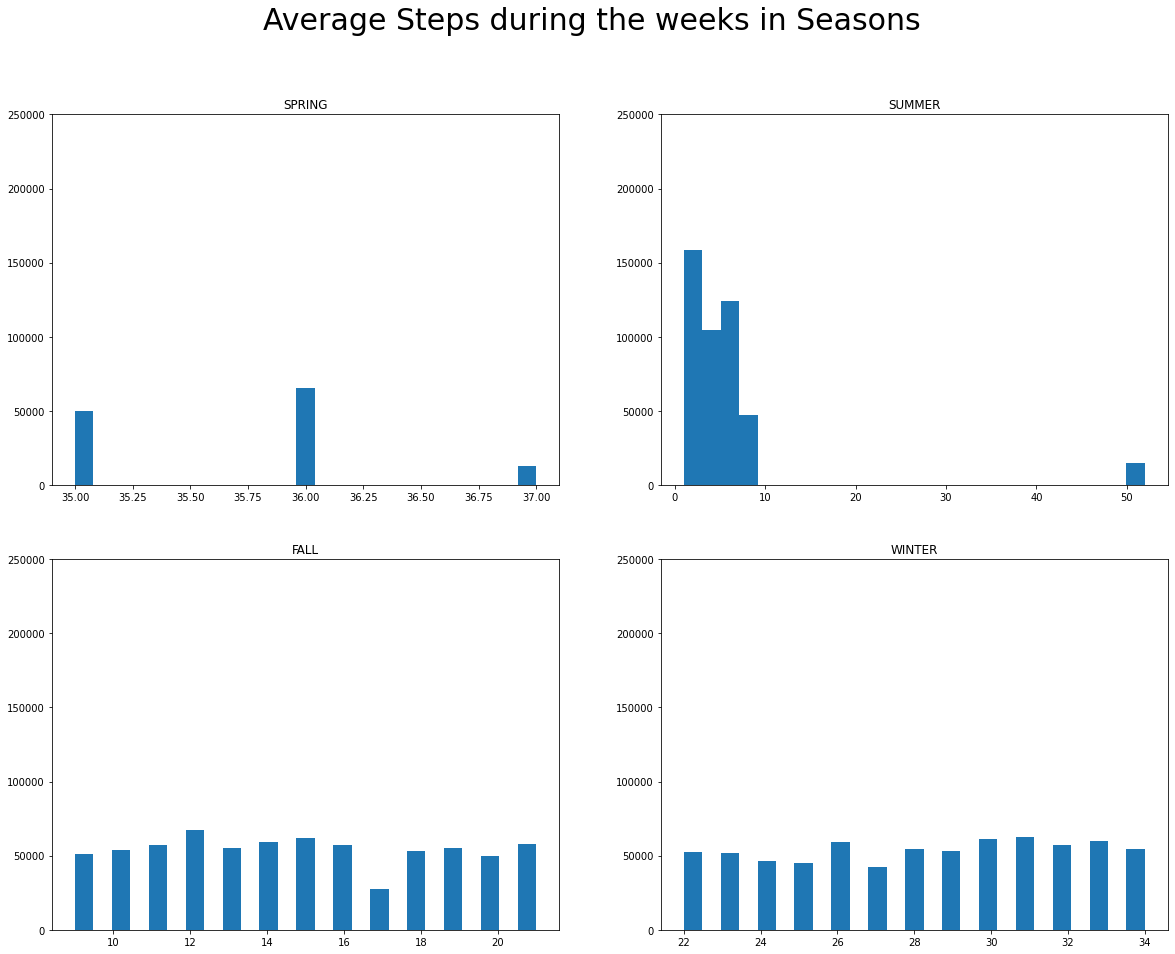

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)

# Overall conclusion


From the above figure, we can see that the distribution of steps in spring and summer is relatively uniform and similar, while in autumn and winter, there is a huge gap between the first few weeks of winter and other weeks, and only one week of data in autumn exists. I think This is related to the incompleteness of the data. The step count data after September is missing. We will continue to explore and solve this problem.

Because the data is not complete in one year, the data in Spring and Summer is missing and it is impossible to observe the trend, so I decided to delete the images them to compare the trend of weekly steps in Fall and Winter.

# Sub question for Lixin Mu

Are students less active during the exam week?

(array([738144., 738152., 738160., 738168., 738176., 738184., 738192.,
        738200., 738208., 738216., 738224., 738232., 738240., 738248.,
        738256., 738264., 738272., 738280., 738288., 738296., 738304.,
        738312., 738320., 738328., 738336., 738344., 738352., 738360.,
        738368., 738376., 738384., 738392., 738400., 738408., 738416.,
        738424., 738432.]), <a list of 37 Text major ticklabel objects>)

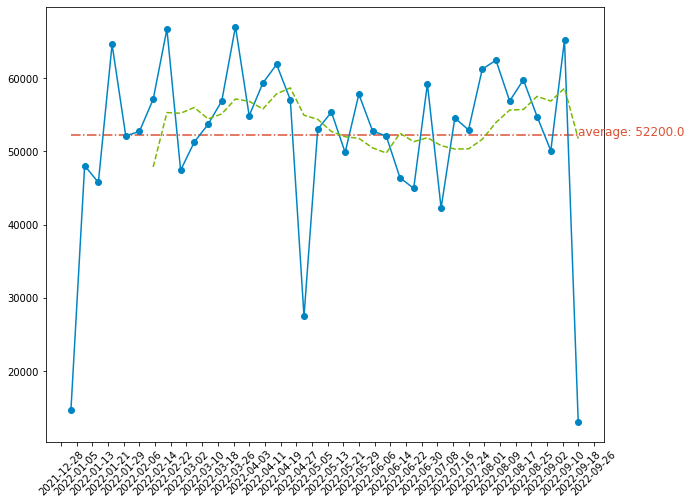

In [30]:
x = weeksum['Finish']
y = weeksum['Steps (count)']# define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
import matplotlib as mpl
xlocator = mpl.ticker.MultipleLocator(8)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot

# Conclusion
Participant 7 also shows no relationship to walk during exam week. Step counts for exam week are above average and indicates clear sign of active.

# Sub question for Yuxiang Ji

In [42]:
Week7_j = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps7.csv")

In [43]:
x = Week7_j.drop(columns='Sedentary')
y = Week7_j['Sedentary']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.5) # I selected 50% of data for testing. Temporarily set random sampling.


In [46]:
model = LogisticRegression()
# model = model.fit(x_train, y_train)
# model

# Overall conclusion 

Through the data analyse, I find that my dataset cannot be predicted by his sub question.As he set the level of steps to determined health and my data all below the level of health,so I cannot do the sub question.